# Australian Students Survey Analysis
This notebook analyzes the dataset of Australian students surveyed for a Statistics class.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../data/survey.csv")
df.head()


,rownames,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,2,Male,19.5,20.5,Left,R on L,104.0,Left,NaN,Regul,177.8,Imperial,17.583
2,3,Male,18.0,13.3,Right,L on R,87.0,Neither,NaN,Occas,NaN,NaN,16.917
3,4,Male,18.8,18.9,Right,R on L,NaN,Neither,NaN,Never,160.0,Metric,20.333
4,5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


## 1. How many students were surveyed?

In [5]:
len(df)

237

## 2. Facts recorded and types (quantitative vs qualitative)

In [6]:
quantitative = df.select_dtypes(include='number').columns.tolist()
qualitative = df.select_dtypes(include='object').columns.tolist()
quantitative, qualitative


(['rownames', 'Wr.Hnd', 'NW.Hnd', 'Pulse', 'Height', 'Age'],
 ['Sex', 'W.Hnd', 'Fold', 'Clap', 'Exer', 'Smoke', 'M.I'])

## 3. Did all students provide all facts?

In [7]:
df.isnull().sum()

rownames     0
Sex          1
Wr.Hnd       1
NW.Hnd       1
W.Hnd        1
Fold         0
Pulse       45
Clap         1
Exer        24
Smoke        1
Height      28
M.I         28
Age          0
dtype: int64

## 4. Balance in terms of sex

In [8]:
df['Sex'].value_counts(dropna=False)

Sex
Female    118
Male      118
NaN         1
Name: count, dtype: int64

## 5. Representation of left-handers, smokers, and exercisers

In [9]:
left_handed = df['W.Hnd'].value_counts(dropna=False)
smoking = df['Smoke'].value_counts(dropna=False)
exercise = df['Exer'].value_counts(dropna=False)
left_handed, smoking, exercise


(W.Hnd
 Right    218
 Left      18
 NaN        1
 Name: count, dtype: int64,
 Smoke
 Never    189
 Occas     19
 Regul     17
 Heavy     11
 NaN        1
 Name: count, dtype: int64,
 Exer
 Freq    115
 Some     98
 NaN      24
 Name: count, dtype: int64)

## 6. Average height and pulse, and spread

In [10]:
height_stats = df['Height'].describe()
pulse_stats = df['Pulse'].describe()
height_stats, pulse_stats


(count    209.000000
 mean     172.380861
 std        9.847528
 min      150.000000
 25%      165.000000
 50%      171.000000
 75%      180.000000
 max      200.000000
 Name: Height, dtype: float64,
 count    192.000000
 mean      74.151042
 std       11.687157
 min       35.000000
 25%       66.000000
 50%       72.500000
 75%       80.000000
 max      104.000000
 Name: Pulse, dtype: float64)

## 7. Boxplots of height and pulse by exercise level

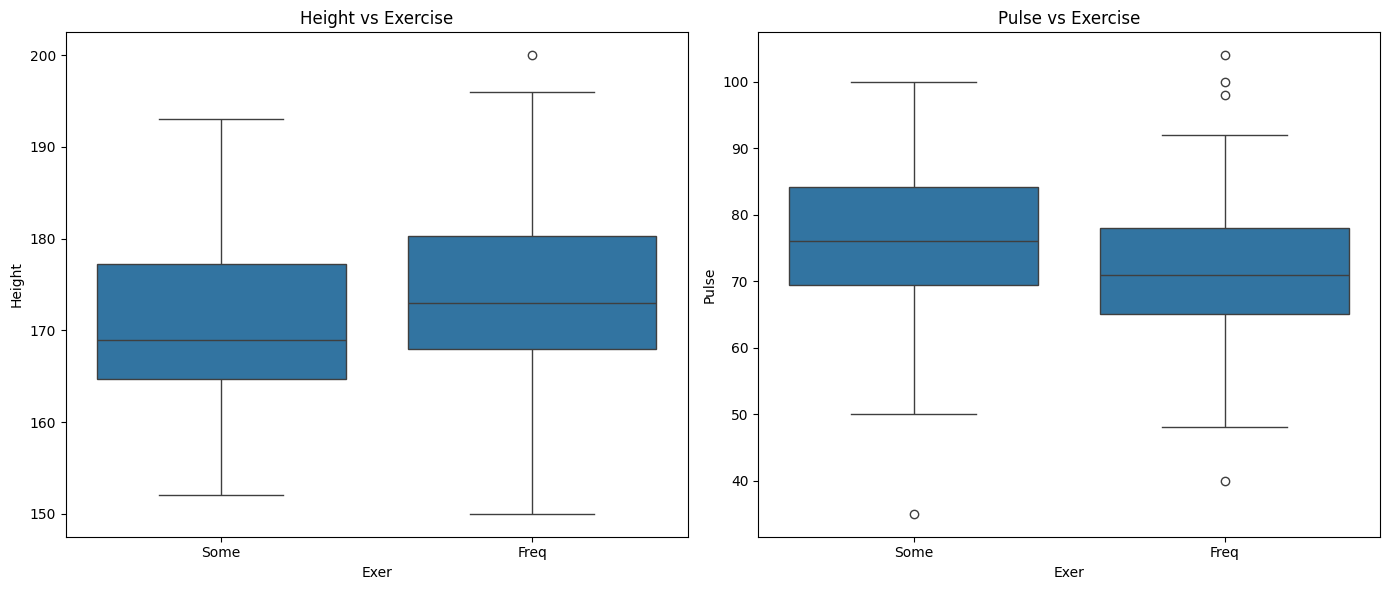

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=df, x='Exer', y='Height', ax=axs[0])
axs[0].set_title('Height vs Exercise')
sns.boxplot(data=df, x='Exer', y='Pulse', ax=axs[1])
axs[1].set_title('Pulse vs Exercise')
plt.tight_layout()
plt.show()


## 8. Boxplot of pulse by smoking habit

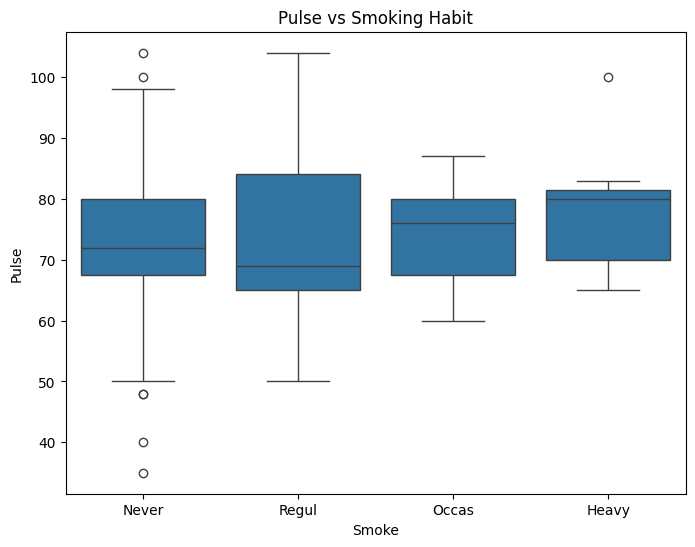

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Smoke', y='Pulse')
plt.title('Pulse vs Smoking Habit')
plt.show()


## 9. Scatter plots of hand spans and height

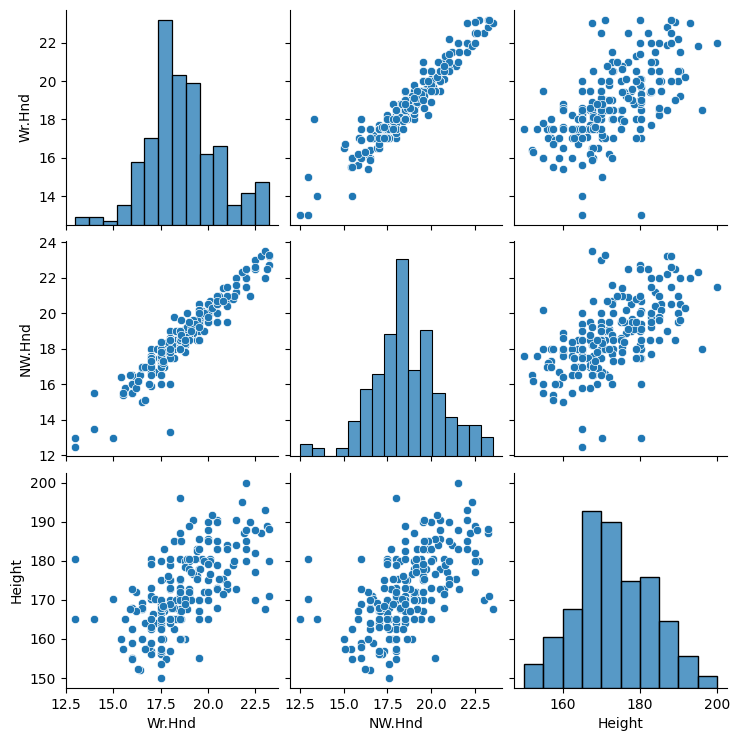

In [13]:
sns.pairplot(df, vars=['Wr.Hnd', 'NW.Hnd', 'Height'])
plt.show()
